In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [5]:
img = cv2.imread('new.jpg',cv2.IMREAD_COLOR)
cv2.line(img,(0,0),(150,150),(255,255,0),15)
#BGR
cv2.rectangle(img,(0,0),(200,150),(0,255,0),5)
cv2.circle(img,(300,300),50,(0,255,0),2)

pts = np.array([[10,5],[20,30],[70,20],[50,10]],np.int32)
cv2.polylines(img,[pts],True,(0,255,255),3)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'opencv',(0,130),font,1,(255,0,0),2)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

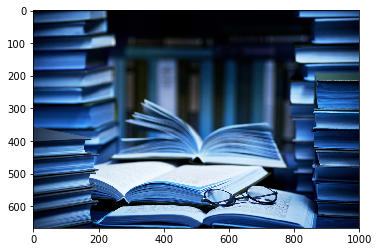

In [7]:
plt.imshow(img,cmap = 'gray',interpolation = 'bicubic')
plt.show()

In [5]:
cap = cv2.VideoCapture(0)
forcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',forcc,20.0,(640,480))

if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) 
    
    cv2.imshow('Input', frame)
    cv2.imshow('gray',gray)

    
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()



In [4]:
img = cv2.imread('new.jpg',cv2.IMREAD_COLOR)
px = img[55,55]
print(px)

[ 4 25 52]


In [6]:
img[100:150,100:150] = [255,255,255]

newimg = img[37:111,107:194]
img[0:74,0:87] = newimg

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [8]:
img1 = cv2.imread('new.jpg')
img2 = cv2.imread('new2.jpg')

rows,cols,channels = img2.shape
roi = img1[0:rows,0:cols]

imggray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret,mask = cv2.threshold(imggray,255,255,cv2.THRESH_BINARY_INV)

#cv2.imshow('mask',imggray)
mask_inv = cv2.bitwise_not(mask)

img1_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

dst = cv2.add(img1_bg,img2_fg)

img1[0:rows,0:cols]=dst
cv2.imshow('res',img1)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [9]:
cap = cv2.VideoCapture(0)

while True:
    _,frame = cap.read()
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)


    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([120,120,50])
    upper_red = np.array([180,255,150])
    
    mask = cv2.inRange(hsv,lower_red,upper_red)
    res = cv2.bitwise_and(frame,frame,mask = mask)
    
   # kernel = np.ones((15,15),np.float32)/225
   # smoothed = cv2.filter2D(res,-1,kernel)
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(mask,kernel,iterations = 1)
    dialoation = cv2.dilate(mask,kernel,iterations = 1)
   # median = cv2.medianBlur(res,15)

    opening = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel)
    closing = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel)


    # cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    #cv2.imshow('erosion',erosion)
    #cv2.imshow('dialoation',dialoation)
    #cv2.imshow('opening',opening)
    #cv2.imshow('closing',closing)
    # cv2.imshow('median',median)
    
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
    
cv2.waitKey(0)
    
cv2.destroyAllWindows()
cap.release()    


In [8]:
cap = cv2.VideoCapture(0)

while True:
    _,frame = cap.read()
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

    laplacian = cv2.Laplacian(frame,cv2.CV_64F)
    sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)
    
    edges = cv2.Canny(frame,100,200)
    
    #cv2.imshow('frame',frame)
    cv2.imshow('laplacian',laplacian)
    #cv2.imshow('sobelx',sobelx)
    cv2.imshow('edges',edges)
    
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
    
    
cv2.destroyAllWindows()
cap.release()  

In [3]:
img32 = cv2.imread('opencv.jpg')
gray = cv2.cvtColor(img32,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv2.goodFeaturesToTrack(gray,50,0.01,10)
corners = np.int0(corners)

for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img32,(x,y),3,255,-1)

cv2.imshow('img',img32)
cv2.waitKey(0)
cv2.destroyAllWindows()




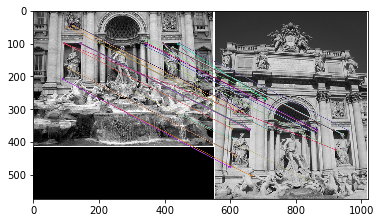

In [7]:
img1 = cv2.imread('1.png',0)
img2 = cv2.imread('2.png',0)

orb = cv2.ORB_create()
kp1,des1 = orb.detectAndCompute(img1,None)
kp2,des2 = orb.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)
matches = bf.match(des1,des2)

matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:40],None,flags = 2)
plt.imshow(img3)
plt.show()

In [2]:
cap = cv2.VideoCapture(0)
fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret,frame = cap.read()

    fgmask = fgbg.apply(frame)
    

    cv2.imshow('fg',fgmask)
    
    
    if cv2.waitKey(1) & 0XFF == ord('q'):
            break
    
    
cv2.destroyAllWindows()
cap.release() 

In [3]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

cap = cv2.VideoCapture(0)

while True:
    ret,img = cap.read()
    img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.5,3)
    
    for(x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,12,13),1)
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for(ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,14),1)
    cv2.imshow('img',img)
    if cv2.waitKey(1) & 0XFF == ord('q'):
            break
    
    
cv2.destroyAllWindows()
cap.release() 
